In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('president-1976-2016.csv')

In [3]:
df.columns

Index(['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',
       'office', 'candidate', 'party', 'writein', 'candidatevotes',
       'totalvotes', 'version', 'notes'],
      dtype='object')

In [4]:
df.shape

(3740, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3740 entries, 0 to 3739
Data columns (total 14 columns):
year              3740 non-null int64
state             3740 non-null object
state_po          3740 non-null object
state_fips        3740 non-null int64
state_cen         3740 non-null int64
state_ic          3740 non-null int64
office            3740 non-null object
candidate         3474 non-null object
party             3404 non-null object
writein           3740 non-null bool
candidatevotes    3740 non-null int64
totalvotes        3740 non-null int64
version           3740 non-null int64
notes             0 non-null float64
dtypes: bool(1), float64(1), int64(7), object(5)
memory usage: 383.6+ KB


In [6]:
#df.drop(['notes','state_po','candidate', 'office','state','writein',], axis = 1,inplace=True )

In [7]:
df.isna().sum()

year                 0
state                0
state_po             0
state_fips           0
state_cen            0
state_ic             0
office               0
candidate          266
party              336
writein              0
candidatevotes       0
totalvotes           0
version              0
notes             3740
dtype: int64

In [8]:
df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN


## Carrying out some EDA on the dataset

### Votes and party summary

In [9]:
print('Total votes casted :',df['totalvotes'].sum())
print('\n')
print('Party with highest number of votes:', df.groupby('party')['totalvotes'].sum().sort_values(ascending=False).head(4))
print('\n')
print('Candidate with highest number of votes:',df.groupby('candidate')['totalvotes'].sum().sort_values(ascending=False).head(4))
print('\n')
print('Candidates and the party they belonged to with the highest number of votes:',df.groupby(['candidate','party'])['totalvotes'].sum().sort_values(ascending=False).head(4))

Total votes casted : 8281421549


Party with highest number of votes: party
republican     1181400794
democrat       1178154564
libertarian    1025075851
independent     595847473
Name: totalvotes, dtype: int64


Candidate with highest number of votes: candidate
Nader, Ralph        303225773
Obama, Barack H.    275398053
Johnson, Gary       252054572
Bush, George W.     242351913
Name: totalvotes, dtype: int64


Candidates and the party they belonged to with the highest number of votes: candidate         party      
Obama, Barack H.  democrat       257622689
Johnson, Gary     libertarian    244252488
Bush, George W.   republican     227943432
Stein, Jill       green          211278492
Name: totalvotes, dtype: int64


In [10]:
 df.groupby('year')['totalvotes'].sum() # total votes casted btw 1976 - 2016

year
1976    605944064
1980    663902096
1984    609936856
1988    537099170
1992    770486377
1996    728343795
2000    783711739
2004    768259747
2008    992684830
2012    879479158
2016    941573717
Name: totalvotes, dtype: int64

### Categorizing our party to just Republican and Democrat

In [11]:
 new_dataframe = df[(df.party=='republican') + (df.party =='democrat')]

C:\Users\Precious\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [12]:
new_dataframe

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
7,1976,Alaska,AK,2,94,81,US President,"Ford, Gerald",republican,False,71555,123574,20171015,NaN
8,1976,Alaska,AK,2,94,81,US President,"Carter, Jimmy",democrat,False,44058,123574,20171015,NaN
11,1976,Arizona,AZ,4,86,61,US President,"Ford, Gerald",republican,False,418642,742719,20171015,NaN
12,1976,Arizona,AZ,4,86,61,US President,"Carter, Jimmy",democrat,False,295602,742719,20171015,NaN
19,1976,Arkansas,AR,5,71,42,US President,"Carter, Jimmy",democrat,False,498604,767535,20171015,NaN
20,1976,Arkansas,AR,5,71,42,US President,"Ford, Gerald",republican,False,267903,767535,20171015,NaN
23,1976,California,CA,6,93,71,US President,"Ford, Gerald",republican,False,3882244,7803770,20171015,NaN
24,1976,California,CA,6,93,71,US President,"Carter, Jimmy",democrat,False,3742284,7803770,20171015,NaN


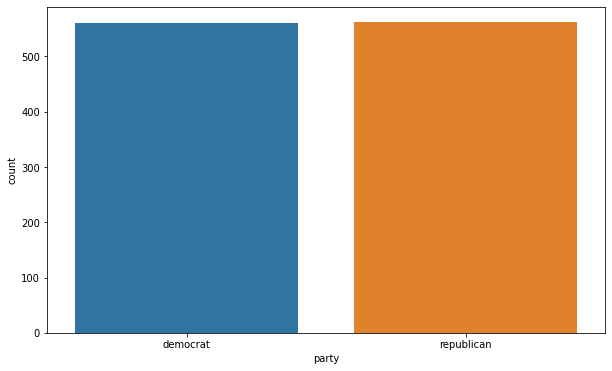

In [13]:
plt.figure(figsize=(10,6))
sns.countplot( data = new_dataframe, x = 'party')

### Data Preprocessing

In [14]:
correlated_features = set()
correlation_matrix = new_dataframe.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [15]:
correlated_features

{'state_ic', 'totalvotes'}

In [16]:
new_dataframe.drop(['state_ic','notes','state','state_po', 'office','writein','candidate'],inplace=True, axis = 1)

C:\Users\Precious\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [18]:
X = new_dataframe.drop('party', axis=1)
target = new_dataframe['party']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(12), scoring='accuracy')
rfecv.fit(X, target)

C:\Users\Precious\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Precious\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Precious\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Precious\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Precious\Anaconda3\lib\site-packages\sklearn\ensemble\f

RFECV(cv=StratifiedKFold(n_splits=12, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators='warn', n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [19]:
print('Optimal number of features: {}'.format(rfecv.n_features_)) # we can see here that we have only 5 important features

Optimal number of features: 5


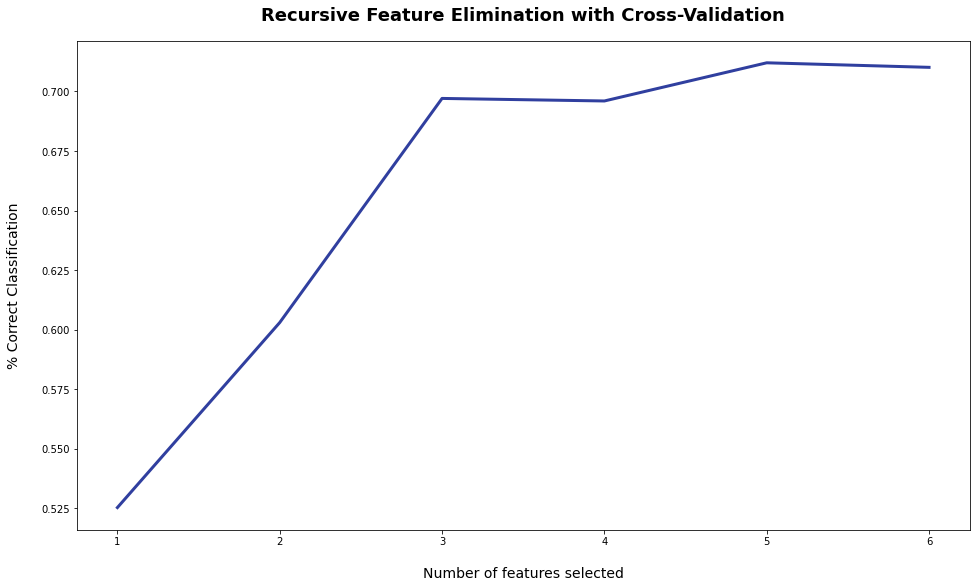

In [20]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

This graph shows us that with 5 features, the Accuracy was about 78% - 80% which is'nt too bad

In [21]:
print(np.where(rfecv.support_ == False)[0])  

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True) 


# By using this snippet, we drop those features that doesn't seem important

[5]


In [22]:
rfecv.estimator_.feature_importances_            #we are left with 5 important features

array([0.11004393, 0.0854739 , 0.08353977, 0.51298265, 0.20795976])

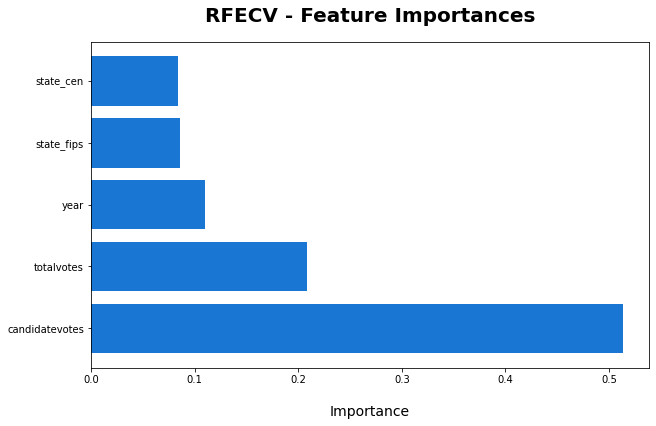

In [23]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

Taking a look at the important features necessary for our data/model

### Training model

In [24]:
print (X.shape)
print('\n')
print(target.shape)

(1123, 5)


(1123,)


In [25]:
y = target

In [26]:
#split the data into training and testing sets

from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Scaling the data

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
normalised_train_df = scaler.fit_transform(x_train)

normalised_train_df = pd.DataFrame(normalised_train_df, columns=x_train.columns)


In [30]:
normalised_train_df.head()

,year,state_fips,state_cen,candidatevotes,totalvotes
0,0.0,0.945455,0.952381,0.091328,0.101861
1,0.1,0.127273,0.869048,0.046854,0.075464
2,0.7,0.272727,0.845238,0.023056,0.033774
3,0.0,0.381818,0.726190,0.074792,0.082075
4,0.1,0.418182,0.488095,0.086653,0.100791


In [31]:
normalised_test_df = scaler.transform(x_test)

normalised_test_df = pd.DataFrame(normalised_test_df, columns=x_train.columns)

In [32]:
normalised_test_df.head()

,year,state_fips,state_cen,candidatevotes,totalvotes
0,1.0,0.218182,0.559524,0.239100,0.283906
1,0.9,0.054545,0.892857,0.130531,0.154764
2,0.3,0.872727,0.904762,0.026398,0.037234
3,0.9,1.000000,0.857143,0.021766,0.009043
4,0.5,0.000000,0.619048,0.084305,0.100354


In [33]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(normalised_train_df, y_train)


C:\Users\Precious\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Measuriing Classification Performance

In [34]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, roc_auc_score,roc_curve


In [35]:
new_predictions = log_reg.predict(normalised_test_df)

cnf_mat = confusion_matrix(y_test, new_predictions)
print(cnf_mat)

[[ 71 100]
 [ 79  87]]


In [36]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)
print('Accuracy: {}'.format(round(accuracy*100), 2))


Accuracy: 47.0


In [37]:
from sklearn import metrics
print(metrics.classification_report(y_true=y_test, y_pred=new_predictions))

              precision    recall  f1-score   support

    democrat       0.47      0.42      0.44       171
  republican       0.47      0.52      0.49       166

    accuracy                           0.47       337
   macro avg       0.47      0.47      0.47       337
weighted avg       0.47      0.47      0.47       337



In [38]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [39]:
#new_predictions

In [40]:
#auc = roc_auc_score(y_test, new_predictions)
#print('AUC: %.2f' % auc)

We can infer that according to this classification report which correlates with the EDA carried out on cell 9 

That the Republican Party slightly edges the Democrat Party to turn out victorious in the election

### Using XGB Classifier

In [41]:
from xgboost import XGBRFClassifier

extreme = XGBRFClassifier()


In [42]:
extreme.fit(normalised_train_df, y_train)
extreme_pred = extreme.predict(normalised_test_df)

In [43]:
#classification report
print(metrics.classification_report(y_test, extreme_pred))

              precision    recall  f1-score   support

    democrat       0.59      0.40      0.48       171
  republican       0.54      0.72      0.61       166

    accuracy                           0.56       337
   macro avg       0.57      0.56      0.55       337
weighted avg       0.57      0.56      0.55       337



In [44]:
#xgboost using gradient boosting
from xgboost import XGBClassifier
extreme1 = XGBClassifier()
extreme1.fit(normalised_train_df, y_train)
extreme1_pred = extreme1.predict(normalised_test_df)

In [45]:
#classification report
print(metrics.classification_report(y_test, extreme1_pred))

              precision    recall  f1-score   support

    democrat       0.59      0.52      0.55       171
  republican       0.56      0.63      0.59       166

    accuracy                           0.58       337
   macro avg       0.58      0.58      0.57       337
weighted avg       0.58      0.58      0.57       337



In [46]:
from lightgbm import LGBMClassifier
light = LGBMClassifier()
light.fit(normalised_train_df, y_train)
light_pred = light.predict(normalised_test_df)

In [47]:
#classification report
print(metrics.classification_report(y_test, light_pred))

              precision    recall  f1-score   support

    democrat       0.57      0.53      0.55       171
  republican       0.55      0.58      0.56       166

    accuracy                           0.55       337
   macro avg       0.56      0.56      0.55       337
weighted avg       0.56      0.55      0.55       337



In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
clf = RandomForestClassifier(max_depth=2, random_state=101)

In [50]:
clf.fit(normalised_train_df, y_train)

C:\Users\Precious\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [51]:
clf_pred = clf.predict(normalised_test_df)

In [52]:
#classification report
print(metrics.classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

    democrat       0.53      0.40      0.46       171
  republican       0.50      0.63      0.56       166

    accuracy                           0.51       337
   macro avg       0.52      0.52      0.51       337
weighted avg       0.52      0.51      0.51       337

